<a href="https://colab.research.google.com/github/Jean-yun/Aiffel_project/blob/main/%5BMission%5Donline_retail_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.9 MB/s eta 0:00:00


## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [4]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [5]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. 이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

* pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.
* 참고 : 슬라이드에서 중심극한정리를 찾아보세요.

In [7]:
print('무작위 표본의 평균: ' ,df.sample(1000)['TotalPrice'].mean())
print('무작위 표본의 표준편차: ' ,df.sample(1000)['TotalPrice'].std())

print('모집단의 평균: ' ,df['TotalPrice'].mean())
print('모집단의 표준편차: ' ,df['TotalPrice'].std())

#모집단은 전체집단이고, 표본은 모집단의 일부 그룹으로 모집단의 대표성을 나타내기 위해 선택된다.
#모집단과 표본의 평균, 표준편차의 차이가 꽤 크다. 샘플이 적은 듯하다.
#중심 극한 정리는 동일한 확률분포를 가진 독립 확률 변수 n개의 평균의 분포는 n이 적당히 크다면 정규분포에 가까워진다는 정리이다

무작위 표본의 평균:  18.65428
무작위 표본의 표준편차:  67.54170285520628
모집단의 평균:  17.98779487699964
모집단의 표준편차:  378.8108235059747


## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [8]:
from scipy import stats
#1) 컬럼 찾기
df[['TotalPrice', 'Country']]

,TotalPrice,Country
0,15.30,United Kingdom
1,20.34,United Kingdom
2,22.00,United Kingdom
3,20.34,United Kingdom
4,20.34,United Kingdom
...,...,...
541904,10.20,France
541905,12.60,France
541906,16.60,France
541907,16.60,France


In [9]:
#2)주문빈도가 가장 많은 상위 두 국가  : UK, Germany
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [10]:
#2-1)주문금액이 가장 많은 상위 두 국가  : UK, Netherlands
df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

In [11]:
#3) 통계적 검증
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.689453,17.987795
std,218.081158,96.759853,1713.600342,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [12]:
#4) 각 국가의 'TotalPrice' 평균
print('영국의 평균금액: ' , round(df[df['Country'] =='United Kingdom']['TotalPrice'].mean(), 2))
print('독일의 평균금액: ' ,round(df[df['Country'] =='Germany']['TotalPrice'].mean(), 2))
print('영국과 독일의 평균 주문금액 차이: ' ,round(df[df['Country'] =='United Kingdom']['TotalPrice'].mean() - df[df['Country'] =='Germany']['TotalPrice'].mean(), 2))


영국의 평균금액:  16.53
독일의 평균금액:  23.35
영국과 독일의 평균 주문금액 차이:  -6.82


In [13]:
#5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요.
#이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.

from scipy.stats import ttest_ind

#가설 : 영국(A)의 평균 주문금액 평균이 독일(B)의 평균 주문금액 평균보다 높다

group_A = df[df['Country'] =='United Kingdom']['TotalPrice']
group_B = df[df['Country'] =='Germany']['TotalPrice']

#t-test검정 수행
t_statistic, p_value = stats.ttest_ind(group_A, group_B, equal_var = False)
t_statistic, p_value.round(4)

(-10.046360185819829, 0.0)

#### **6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.**

- t-statistic는 t-통계량으로, 두 군 간의 평균 차이를 표준 오차로 나눈 값입니다. 음수인 경우는 첫 번째 군의 평균이 두 번째 군의 평균보다 작음을 나타냅니다. 따라서 -10.046360185819829는 두 국가 간의 'TotalPrice'의 평균 차이가 통계적으로 유의미하게 작다는 것을 나타냅니다.

- p-value는 귀무가설이 참일 때 표본 데이터에서 관측된 통계량보다 더 극단적인 결과가 나올 확률을 나타냅니다. 여기서 p-value가 0.0으로 나왔다는 것은 매우 작은 확률로 인해 귀무가설을 기각할 수 있다는 것을 의미합니다. 따라서 두 국가 간의 'TotalPrice'의 평균에는 통계적으로 유의미한 차이가 있다고 할 수 있습니다.

- 종합적으로, 이 결과는 두 국가 간의 'TotalPrice'의 평균 차이가 통계적으로 유의미하다는 것을 나타내며, 귀무가설을 기각하고 대립가설을 채택할 수 있습니다.

- 1종 오류 : 귀무가설이 참인데도, 귀무가설을 기각하는 오류
- 2종 오류 : 실제로는 두 국가간 'TotalPrice' 평균에 차이가 있는데도, 유의미한 차이가 없다고 결론내리는 것

- 결론적으로, 이 경우에는 통계적으로 영국과 독일의 평균 가격에 유의미한 차이가 있다. 따라서 1종 오류의 확률은 낮을 것으로 예상된다.



## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

* 참고 : [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* 참고 : 슬라이드의 "기술 통계" 부분을 찾아보세요.

In [14]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

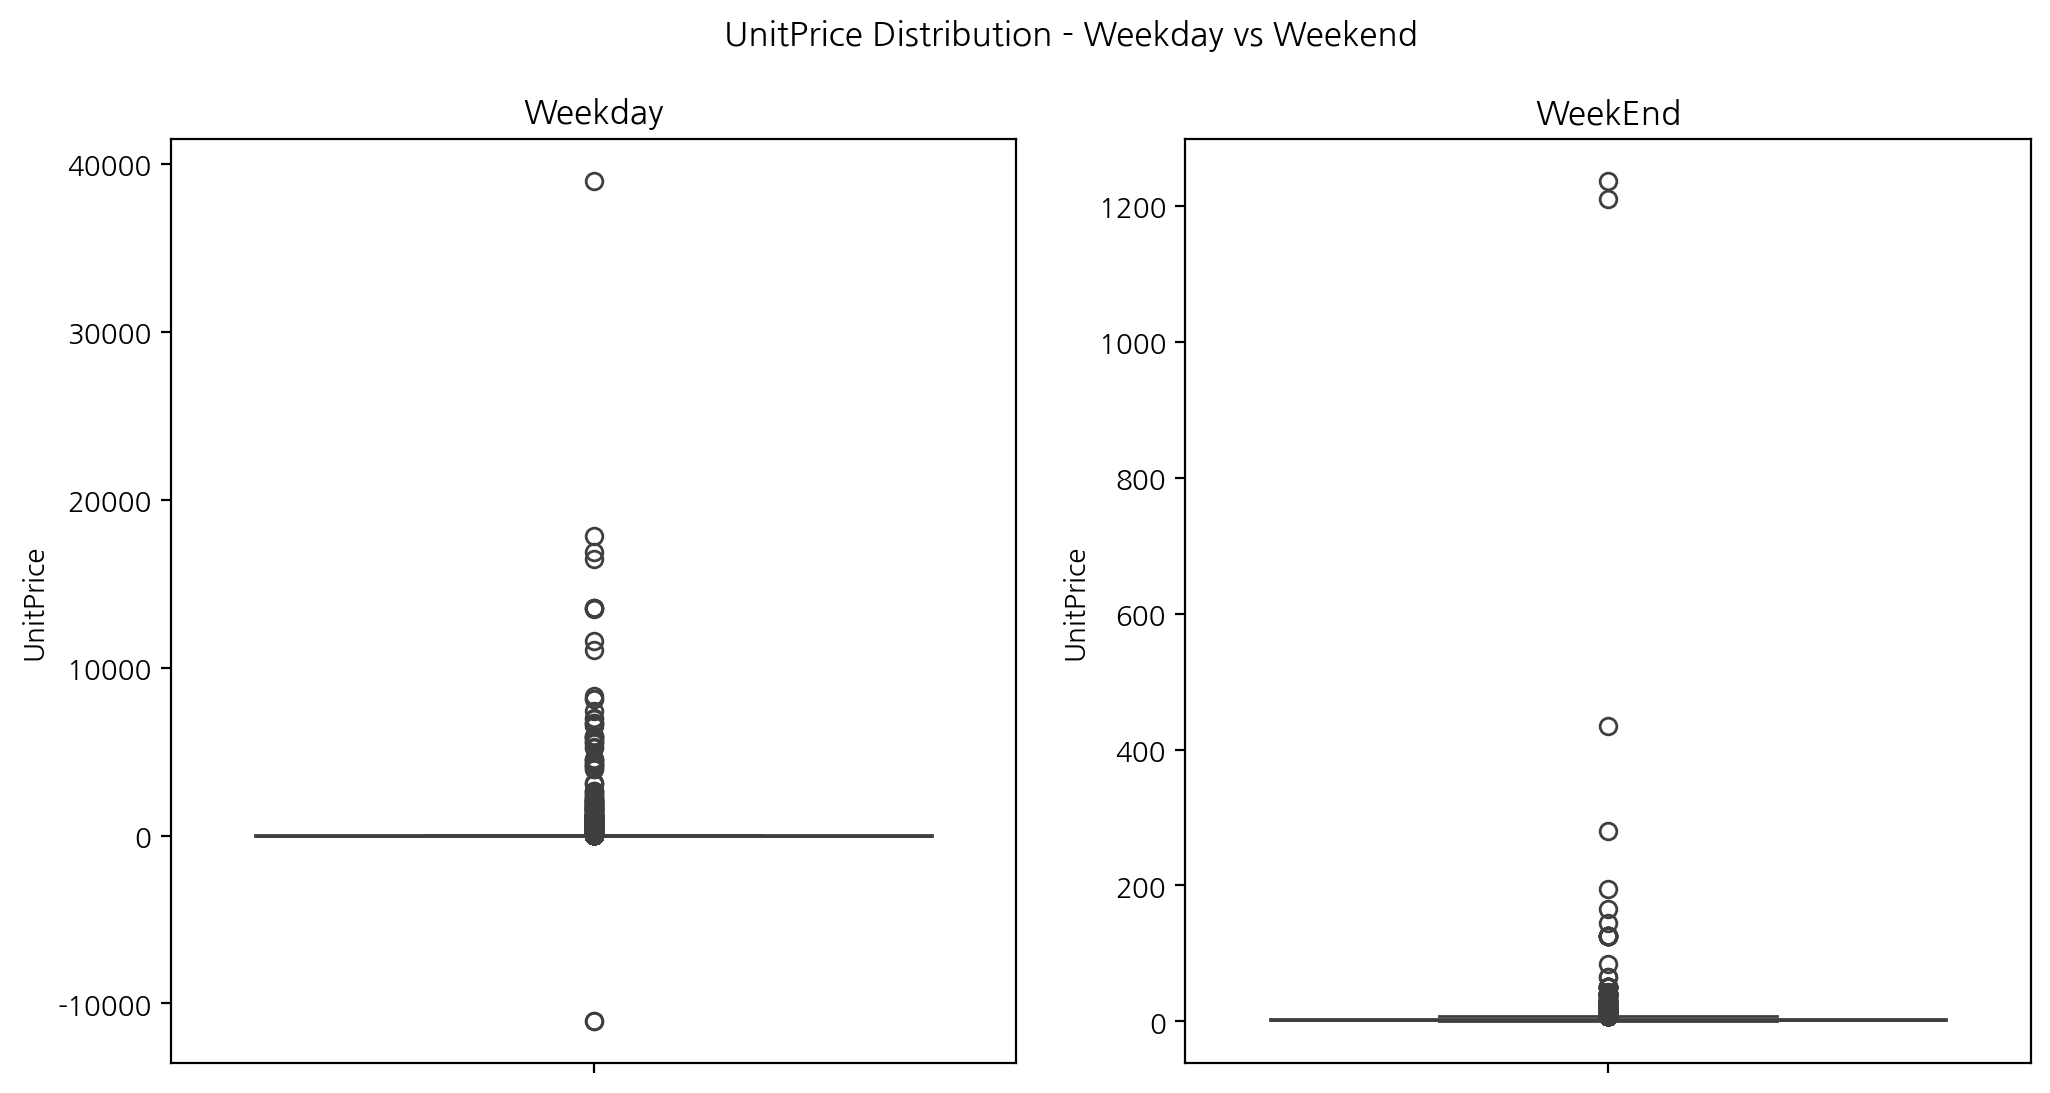

In [15]:
# 'UnitPrice'의 상자수염그림
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=weekday_data, y='UnitPrice', ax=axes[0])
axes[0].set_title('Weekday')
sns.boxplot(data=weekend_data, y='UnitPrice', ax=axes[1])
axes[1].set_title('WeekEnd')
plt.suptitle('UnitPrice Distribution - Weekday vs Weekend')
plt.show()



In [ ]:
# 'UnitPrice'의 히스토그램

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
sns.histplot(data=weekday_data, x='UnitPrice', color='blue')
plt.title('UnitPrice Histogram - Weekday')

plt.subplot(1,2,2)
sns.histplot(data=weekend_data, x='UnitPrice', color='orange')
plt.title('UnitPrice Histogram - Weekend')
plt.show()

In [17]:

# 주중과 주말의 기술통계와 분위수 계산n(#데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.)
weekday_stats = weekday_data['UnitPrice'].describe()
weekend_stats = weekend_data['UnitPrice'].describe()
quantiles = df.groupby('WeekEnd')['UnitPrice'].quantile([0.25, 0.5, 0.75])

# 결과 출력
print("주중 기술통계:")
print(weekday_stats)
print("\n주말 기술통계:")
print(weekend_stats)
print("\n주중과 주말의 분위수:")
print(quantiles)

주중 기술통계:
count    477534.000000
mean          4.843425
std         103.032058
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

주말 기술통계:
count    64375.000000
mean         2.887824
std          7.959497
min          0.000000
25%          1.250000
50%          1.850000
75%          3.750000
max       1236.750000
Name: UnitPrice, dtype: float64

주중과 주말의 분위수:
WeekEnd      
주말       0.25    1.25
         0.50    1.85
         0.75    3.75
주중       0.25    1.25
         0.50    2.10
         0.75    4.13
Name: UnitPrice, dtype: float64


## 미션4)  'TotalPrice'의 중간값이 특정 값과 다른지 검증하기 위해 비모수 검정 (예: 맨-휘트니 U-검정)을 사용하세요. 검증 결과에 대해 비즈니스 관점에서 분석해 주세요.

* 비모수 검정은 데이터가 정규 분포를 따르지 않거나, 정규 분포에 대한 가정을 할 수 없을 때 사용됩니다. 특히, 작은 표본 크기, 이상치의 존재, 순위나 순서와 같은 비정량적 데이터에 적합합니다. 또한, 두 그룹 간의 중앙값이나 분포의 형태가 다를 때 비모수 검정을 사용할 수 있습니다.

* 맨-휘트니 U-검정은 두 독립적인 표본 간에 중앙값의 차이를 비교하는 데 사용됩니다. 이 검정은 두 그룹의 데이터가 서로 독립적이며, 최소한 서열 척도로 측정되어야 합니다. 데이터의 분포 형태에 대한 가정이 필요 없으며, 크기가 다른 두 표본에 대해서도 사용할 수 있습니다. 이 검정은 데이터의 중앙값이 특정 값과 다른지 여부를 검증하는 데 유용합니다.

다음의 주어진 코드를 활용해 주세요.

```python
from scipy.stats import mannwhitneyu
# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
```

* 참고 : https://www.ibm.com/docs/ko/spss-statistics/beta?topic=tests-mann-whitney-u-test

In [18]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [19]:
observed_value = df['TotalPrice'].median()

group_A = df[df['Country']=='United Kingdom']['TotalPrice']
group_B = df[df['Country']=='Germany']['TotalPrice']

stats.mannwhitneyu(group_A, group_B)


MannwhitneyuResult(statistic=1406214968.0, pvalue=0.0)

In [20]:
df.groupby("Country")["TotalPrice"].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Australia,1259.0,108.877895,159.010963,-425.00,16.5000,51.84,145.000,1718.40
Austria,401.0,25.322494,34.579338,-21.25,13.5000,17.00,22.500,360.00
Bahrain,19.0,28.863158,73.816333,-205.74,17.7000,25.50,34.800,205.74
Belgium,2069.0,19.773301,15.583858,-19.95,12.7500,16.60,20.400,165.00
Brazil,32.0,35.737500,32.896282,15.00,16.5000,19.65,47.475,175.20
Canada,151.0,24.280662,61.117249,2.50,10.5000,16.50,19.800,550.94
Channel Islands,758.0,26.499063,39.784329,-293.00,15.0000,17.70,25.200,408.00
Cyprus,622.0,20.813971,34.078667,-320.69,9.9500,16.20,22.500,320.69
Czech Republic,30.0,23.590667,26.302604,-35.76,15.6000,25.30,39.780,70.80


## 미션5) UnitPrice 컬럼에 대한 95% 신뢰구간을 구하고  seaborn 으로 신뢰구간을 시각화 해주세요. 그리고 이 신뢰구간이 비즈니스 결정에 어떻게 활용될 수 있는지 설명하세요.

In [21]:
from scipy import stats
from scipy.stats import norm

In [22]:
#95% confidence interval
unitprice_data = df['UnitPrice']
confidence_interval = norm.interval(0.95, loc=np.mean(unitprice_data), scale=np.std(unitprice_data))


In [ ]:
#visualize
plt.figure(figsize=(10, 6))
sns.histplot(unitprice_data, kde=True, color='blue', stat='density')
plt.title('UnitPrice Dist. with 95% Confidence Interval')

plt.axvline(confidence_interval[0], color='red', ls='--', lw=2)
plt.axvline(confidence_interval[1], color='red', ls='--', lw=2)

plt.show()

## 신뢰구간이 비즈니스 결정에 활용될 수 있는 케이스

1. 가격 예측의 신뢰성 확인: 만약 이 데이터가 제품 가격에 대한 것이라면, 95% 신뢰구간을 통해 향후 제품 가격의 예측이 얼마나 신뢰성 있게 이루어질 수 있는지 확인할 수 있습니다.

2. 할인 및 프로모션 결정: 가격에 대한 신뢰구간을 고려하면 할인 또는 프로모션을 결정할 때 예상 수익과 위험을 조절하는 데 도움이 됩니다.

3. 고객 대상 마케팅: 특정 가격 범위에 속하는 고객층을 대상으로 하는 마케팅 전략을 수립할 때, 해당 가격대의 신뢰구간을 고려하여 마케팅 예산을 최적화할 수 있습니다.

4. 투자 결정: 가격이 중요한 업종에서는 향후 투자 결정에 있어서 이 신뢰구간을 활용하여 예상 수익과 위험을 신중하게 고려할 수 있습니다.